<a href="https://colab.research.google.com/github/shreyas1209/Sudoku_Solver_App/blob/main/Sudoku_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch.nn.functional as F
import time 
import random
from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import TensorDataset
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import torchvision.utils as vutils

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [ ]:
X = ((X-np.mean(X))/(np.std(X)))
X = X.reshape(X.shape[0],1,28,28)


In [ ]:
X = X.astype('float32')
y = np.int_(y)


In [ ]:
X = torch.tensor(X,device = device,dtype = torch.float)
y = torch.tensor(y,device = device)
y = y.type(torch.LongTensor)

In [ ]:
X_printed = torch.load('/content/gdrive/MyDrive/Sudoku/printed_mnist/assets/X_printed_tensor',map_location= device)
X_printed = X_printed.to(dtype = torch.float)
y_printed = torch.load('/content/gdrive/MyDrive/Sudoku/printed_mnist/assets/y_printed_tensor',map_location= device)

In [ ]:
X_print_train,X_print_val,y_print_train,y_print_val = train_test_split(X_printed,y_printed, test_size=0.2, random_state=42)
print(X_print_train.shape,X_print_val.shape,y_print_train.shape,y_print_val.shape)

torch.Size([2764, 1, 28, 28]) torch.Size([692, 1, 28, 28]) torch.Size([2764]) torch.Size([692])


In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X,y, test_size=0.33, random_state=42)
X_train = X_train.to(device)
X_val = X_val.to(device)
y_train = y_train.to(device)
y_val = y_val.to(device)



In [ ]:
X_train1 = torch.cat((X_train,X_print_train))
X_val1 = torch.cat((X_val,X_print_val))
y_train1 = torch.cat((y_train,y_print_train))
y_val1 = torch.cat((y_val,y_print_val))

print(X_train1.shape,y_train1.shape,X_val1.shape,y_val1.shape)


torch.Size([49664, 1, 28, 28]) torch.Size([49664]) torch.Size([23792, 1, 28, 28]) torch.Size([23792])


In [ ]:
train_dataset = TensorDataset(X_train,y_train)
val_dataset = TensorDataset(X_val,y_val)

In [ ]:
train_dataset1 = TensorDataset(X_train1,y_train1)
val_dataset1 = TensorDataset(X_val1,y_val1)

In [ ]:
batchsize = 64
train_dataloader = DataLoader(dataset=train_dataset,batch_size = batchsize)
val_dataloader = DataLoader(dataset=val_dataset,batch_size = batchsize)
train_dataloader1 = DataLoader(dataset=train_dataset1,batch_size = batchsize)
val_dataloader1 = DataLoader(dataset=val_dataset1,batch_size = batchsize)

In [ ]:
'''#plotting the images
train_batch = next(iter(train_dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(train_batch[0][:64], padding=2, normalize=True),(1,2,0)))'''


'#plotting the images\ntrain_batch = next(iter(train_dataloader))\nplt.figure(figsize=(8,8))\nplt.axis("off")\nplt.title("Training Images")\nplt.imshow(np.transpose(vutils.make_grid(train_batch[0][:64], padding=2, normalize=True),(1,2,0)))'

In [ ]:
'''#plotting a set of  val images
val_batch = next(iter(val_dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Test Images")
plt.imshow(np.transpose(vutils.make_grid(val_batch[0][:64], padding=2, normalize=True),(1,2,0)))'''

'#plotting a set of  val images\nval_batch = next(iter(val_dataloader))\nplt.figure(figsize=(8,8))\nplt.axis("off")\nplt.title("Test Images")\nplt.imshow(np.transpose(vutils.make_grid(val_batch[0][:64], padding=2, normalize=True),(1,2,0)))'

In [ ]:
'''#plotting the images
train_batch = next(iter(train_dataloader1))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(train_batch[0][:64], padding=2, normalize=True),(1,2,0)))'''


'#plotting the images\ntrain_batch = next(iter(train_dataloader1))\nplt.figure(figsize=(8,8))\nplt.axis("off")\nplt.title("Training Images")\nplt.imshow(np.transpose(vutils.make_grid(train_batch[0][:64], padding=2, normalize=True),(1,2,0)))'

In [ ]:
'''#plotting a set of  val images
val_batch = next(iter(val_dataloader1))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Test Images")
plt.imshow(np.transpose(vutils.make_grid(val_batch[0][:64], padding=2, normalize=True),(1,2,0)))'''

'#plotting a set of  val images\nval_batch = next(iter(val_dataloader1))\nplt.figure(figsize=(8,8))\nplt.axis("off")\nplt.title("Test Images")\nplt.imshow(np.transpose(vutils.make_grid(val_batch[0][:64], padding=2, normalize=True),(1,2,0)))'

In [ ]:
def check_accuracy(model,dataloader):
  num_correct = 0
  num_samples = 0
  model.eval()
  model = model.to(device)
  
  with torch.no_grad():
    for DATA  in dataloader:
      data = DATA[0]
      data = data.to(device)
      classes = DATA[1]
      classes = classes.to(device)
      scores = model(data)
      predictions = scores.argmax(1)
      num_correct += sum((predictions == classes))
      num_samples += predictions.size(0)

    return float(num_correct)/float(num_samples)


In [ ]:
def train (model,loss_function,optimizer,train_dl,val_dl,epochs):
  if torch.cuda.is_available(): torch.cuda.empty_cache()
  model = model.to(device = device)
  history = {"train_accuracies": [], "val_accuracies": [], "loss":[]}

  for epoch in range (epochs):
    
    model.train()
    train_loss = 0
    start = time.time()

    for batch_no,DATA in enumerate(train_dl,0):
      data,classes = DATA
      optimizer.zero_grad()
      data = data.to(torch.float32)
      data = data.to(device)
      classes = classes.to(device)
      outputs = model(data)
      loss = loss_function(outputs,classes)
      loss.backward()
      optimizer.step()

      
      running_loss = loss.item()
    
    #getting the stats
    history['train_accuracies'].append(check_accuracy(model,train_dl))
    history['val_accuracies'].append(check_accuracy(model,val_dl))
    history['loss'].append(running_loss/(len(train_dl)))
    
    end = time.time()
    total_time = end-start

    #printing the stats
    print('Epoch ({}/{}),Training loss : {:.8f}, Time: {:.2f}, train_accuracy:{:.4f}, val_accuracy:{:.4f}'.format(
          epoch+1, epochs, history["loss"][-1], total_time, history["train_accuracies"][-1], history["val_accuracies"][-1]))

  return model, history

In [ ]:
#importing the model

import sys

sys.path.append('/content/gdrive/MyDrive/Sudoku/Models')

In [ ]:
from sudoku_net import *

In [ ]:
def plot_analysis(history,epochs):
  epoch_no = [(i+1) for i in range(epochs)]

  plt.plot(epoch_no,history["train_accuracies"], label = 'Train Accuracies')
  plt.plot(epoch_no,history["val_accuracies"], label = 'Validation Accuracies')
  plt.xlabel("Epochs")
  plt.ylabel("Accuracies")
  plt.title('Accuracy')
  plt.legend()
  plt.show()

  plt.plot(epoch_no,history["loss"])
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title('Loss')
  plt.show()


In [ ]:
epochs = 25
learning_rate = 1e-3

In [ ]:
model1  = sudokunet1(output_classes=10)
model2 = sudokunet2(output_classes=10)
model3 = sudokunet3(output_classes=10)

loss_fn = nn.CrossEntropyLoss()
optimizer1 = optim.Adam(model1.parameters(), lr = learning_rate)
optimizer2 = optim.Adam(model2.parameters(), lr = learning_rate)
optimizer3 = optim.Adam(model3.parameters(), lr = learning_rate)


In [ ]:
start = time.time()
model1,history1 = train(model = model1,
                      loss_function=loss_fn,
                      optimizer = optimizer1,
                      train_dl = train_dataloader1,
                      val_dl = val_dataloader1,
                      epochs = epochs)
end = time.time()
elapsed = end-start
print("Total time :", elapsed)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/content/gdrive/MyDrive/Sudoku/Models/sudoku_net.py:40: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


Epoch (1/25),Training loss : 0.00244340, Time: 3.56, train_accuracy:0.8619, val_accuracy:0.8658
Epoch (2/25),Training loss : 0.00225129, Time: 3.46, train_accuracy:0.9226, val_accuracy:0.9236
Epoch (3/25),Training loss : 0.00211765, Time: 3.40, train_accuracy:0.9517, val_accuracy:0.9533
Epoch (4/25),Training loss : 0.00209323, Time: 3.39, train_accuracy:0.9669, val_accuracy:0.9681
Epoch (5/25),Training loss : 0.00206724, Time: 3.46, train_accuracy:0.9705, val_accuracy:0.9693
Epoch (6/25),Training loss : 0.00205159, Time: 3.39, train_accuracy:0.9754, val_accuracy:0.9728
Epoch (7/25),Training loss : 0.00202988, Time: 3.40, train_accuracy:0.9762, val_accuracy:0.9720
Epoch (8/25),Training loss : 0.00201219, Time: 3.40, train_accuracy:0.9819, val_accuracy:0.9801
Epoch (9/25),Training loss : 0.00198303, Time: 3.40, train_accuracy:0.9781, val_accuracy:0.9734
Epoch (10/25),Training loss : 0.00197150, Time: 3.55, train_accuracy:0.9828, val_accuracy:0.9787
Epoch (11/25),Training loss : 0.0019867

In [ ]:
start = time.time()
model2,history2 = train(model = model2,
                      loss_function=loss_fn,
                      optimizer = optimizer2,
                      train_dl = train_dataloader1,
                      val_dl = val_dataloader1,
                      epochs = epochs)
end = time.time()
elapsed = end-start
print("Total time :", elapsed)

/content/gdrive/MyDrive/Sudoku/Models/sudoku_net.py:75: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


Epoch (1/25),Training loss : 0.00238637, Time: 3.49, train_accuracy:0.9374, val_accuracy:0.9440
Epoch (2/25),Training loss : 0.00236624, Time: 3.59, train_accuracy:0.9562, val_accuracy:0.9592
Epoch (3/25),Training loss : 0.00221429, Time: 3.47, train_accuracy:0.9654, val_accuracy:0.9674
Epoch (4/25),Training loss : 0.00219691, Time: 3.55, train_accuracy:0.9662, val_accuracy:0.9688
Epoch (5/25),Training loss : 0.00215786, Time: 3.48, train_accuracy:0.9739, val_accuracy:0.9713
Epoch (6/25),Training loss : 0.00212706, Time: 3.49, train_accuracy:0.9695, val_accuracy:0.9677
Epoch (7/25),Training loss : 0.00205134, Time: 3.47, train_accuracy:0.9812, val_accuracy:0.9789
Epoch (8/25),Training loss : 0.00199103, Time: 3.50, train_accuracy:0.9804, val_accuracy:0.9779
Epoch (9/25),Training loss : 0.00196527, Time: 3.46, train_accuracy:0.9828, val_accuracy:0.9804
Epoch (10/25),Training loss : 0.00200368, Time: 3.45, train_accuracy:0.9828, val_accuracy:0.9789
Epoch (11/25),Training loss : 0.0019582

In [ ]:
start = time.time()
model3,history3 = train(model = model3,
                      loss_function=loss_fn,
                      optimizer = optimizer3,
                      train_dl = train_dataloader1,
                      val_dl = val_dataloader1,
                      epochs = epochs)
end = time.time()
elapsed = end-start
print("Total time :", elapsed)

/content/gdrive/MyDrive/Sudoku/Models/sudoku_net.py:109: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


Epoch (1/25),Training loss : 0.00247936, Time: 3.55, train_accuracy:0.9239, val_accuracy:0.9292
Epoch (2/25),Training loss : 0.00229523, Time: 3.60, train_accuracy:0.9465, val_accuracy:0.9494
Epoch (3/25),Training loss : 0.00215031, Time: 3.55, train_accuracy:0.9579, val_accuracy:0.9591
Epoch (4/25),Training loss : 0.00219142, Time: 3.54, train_accuracy:0.9723, val_accuracy:0.9715
Epoch (5/25),Training loss : 0.00219547, Time: 3.51, train_accuracy:0.9655, val_accuracy:0.9649
Epoch (6/25),Training loss : 0.00207763, Time: 3.57, train_accuracy:0.9765, val_accuracy:0.9749
Epoch (7/25),Training loss : 0.00206666, Time: 3.63, train_accuracy:0.9733, val_accuracy:0.9708
Epoch (8/25),Training loss : 0.00208614, Time: 3.51, train_accuracy:0.9824, val_accuracy:0.9788
Epoch (9/25),Training loss : 0.00214346, Time: 3.72, train_accuracy:0.9780, val_accuracy:0.9737
Epoch (10/25),Training loss : 0.00208362, Time: 3.66, train_accuracy:0.9812, val_accuracy:0.9769
Epoch (11/25),Training loss : 0.0021015

In [ ]:
torch.save(model1.state_dict(), 'model1_weights.pth')
torch.save(model2.state_dict(), 'model2_weights.pth')
torch.save(model3.state_dict(), 'model3_weights.pth')

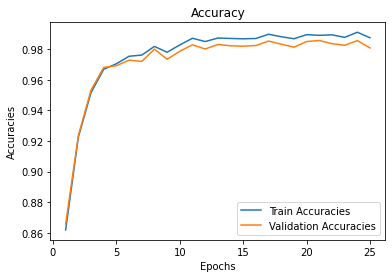

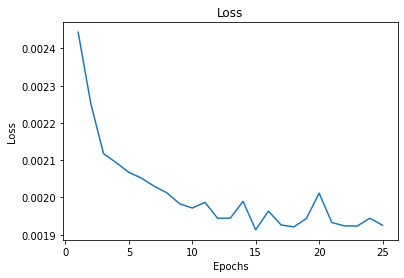

In [ ]:
plot_analysis(history1,epochs)

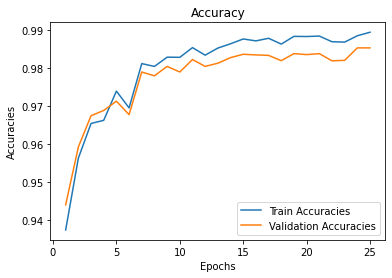

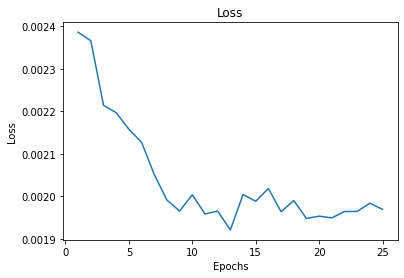

In [ ]:
plot_analysis(history2,epochs)

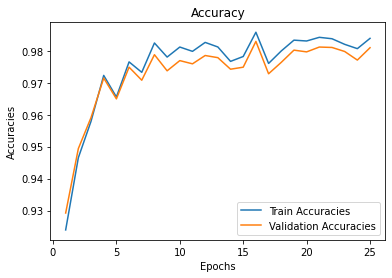

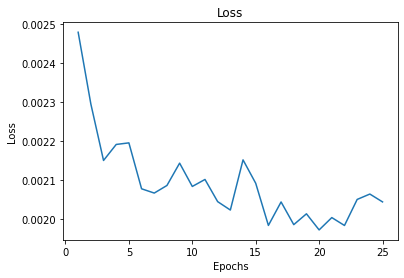

In [ ]:
plot_analysis(history3,epochs)